# Tarefa 2: Algoritmo Naive Bayes
### Aluno: José Ivo Schwade Araújo

### 0. Importando as bibliotecas necessárias e carregando a base de dados

In [56]:
# Importação das bibliotecas necessárias
import numpy as np                                            # Biblioteca para operações numéricas
import pandas as pd                                           # Biblioteca para manipulação de dados em DataFrames
from sklearn.model_selection import train_test_split          # Função para dividir os dados em treino e teste
from sklearn.feature_extraction.text import CountVectorizer   # Transforma texto em representações vetoriais
from sklearn.naive_bayes import BernoulliNB                   # Classificador Naive Bayes com distribuição de Bernoulli
from sklearn.neighbors import KNeighborsClassifier            # Classificador k-NN
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report  # Métricas de avaliação
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt                               # Biblioteca de visualização gráfica
import seaborn as sns                                         # Biblioteca de visualização baseada em matplotlib, com estilo melhorado
# Para figuras geradas pelo matplotlib serem exibidas diretamente no notebook
%matplotlib inline

In [47]:
# Carregamento do dataset de spam
url = "https://raw.githubusercontent.com/justmarkham/pycon-2016-tutorial/master/data/sms.tsv"
df = pd.read_csv(url, sep='\t', header=None, names=['label', 'message'])

# Visualização dos dados
print("Visualização das primeiras linhas do dataset:")
display(df.head(11))

Visualização das primeiras linhas do dataset:


,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
5,spam,FreeMsg Hey there darling it's been 3 week's n...
6,ham,Even my brother is not like to speak with me. ...
7,ham,As per your request 'Melle Melle (Oru Minnamin...
8,spam,WINNER!! As a valued network customer you have...
9,spam,Had your mobile 11 months or more? U R entitle...


### 1. Testando outras métricas do KNN na base de dados SMS Spam Collection

#### Pré-processamento dos dados

In [48]:
# Conversão das labels para valores binários
df['label'] = df['label'].map({'ham': 0, 'spam': 1})

# Divisão dos dados em treino e teste
X_train_spam, X_test_spam, y_train_spam, y_test_spam = train_test_split(  # Divide dados em treino (70%) e teste (30%)
    df['message'],  # Variável independente: textos das mensagens
    df['label'],    # Variável dependente: rótulo binário
    test_size=0.3,  # Proporção de teste: 30%
    random_state=42 # Semente para reprodutibilidade dos resultados
)

# Transformação dos textos em vetores de contagem de palavras (binário)
vectorizer = CountVectorizer(binary=True)         # Inicializa o vetor com contagem binária (presença/ausência da palavra)
X_train_vec = vectorizer.fit_transform(X_train_spam)   # Ajusta e transforma os dados de treino em vetores binários
X_test_vec = vectorizer.transform(X_test_spam)         # Transforma os dados de teste com o mesmo vocabulário aprendido no treino

Normalização dos dados para o KNN

In [49]:
scaler = StandardScaler(with_mean=False)
X_train_scaled = scaler.fit_transform(X_train_vec)
X_test_scaled = scaler.transform(X_test_vec)

Testando, finalmente, outras métricas para o KNN

In [50]:
resultadosKNN = []
# Métrica Cosine sendo testada no lugar da Chebyshev pois estamos tratando dados esparsos.
distances = ['euclidean', 'cityblock', 'cosine']
for distance in distances:
  KNN = KNeighborsClassifier(metric=distance)
  KNN.fit(X_train_scaled, y_train_spam)
  y_pred = KNN.predict(X_test_scaled)
  accuracy = accuracy_score(y_test_spam, y_pred)
  resultadosKNN.append({
      'distance' : distance,
      'accuracy' : accuracy
  })

df_resultadosKNN = pd.DataFrame(resultadosKNN)
print(df_resultadosKNN.sort_values(by='accuracy', ascending=False))


    distance  accuracy
2     cosine  0.955742
1  cityblock  0.895933
0  euclidean  0.879785


Portanto, temos que a melhor métrica para o modelo é a `cosine`, com um total de 0.955742 de precisão.

### 2.1 Carregando a base `digits` e pré-processando seus dados

In [66]:
from ucimlrepo import fetch_ucirepo
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import numpy as np

ORHD = fetch_ucirepo(id=80)

features = ORHD.data.features.to_numpy().astype(np.float32) / 16.0
features = (features >= 0.5).astype(np.int64)  # binariza para BernoulliNB
targets = ORHD.data.targets.to_numpy().astype(np.int64).ravel()

X_train_digits, X_test_digits, y_train_digits, y_test_digits = train_test_split(features, targets, test_size=0.3, random_state=42)

### 2.2 Treinando um modelo Naive Bayes (Bernoulli)

In [77]:
model = BernoulliNB()
model.fit(X_train_digits, y_train_digits)

y_pred_NB = model.predict(X_test_digits)
accuracy_NB = accuracy_score(y_test_digits, y_pred_NB)
classification_report_NB = classification_report(y_test_digits, y_pred_NB)
confusion_matrix_NB = confusion_matrix(y_test_digits, y_pred_NB)

print("Acurácia:", accuracy_NB)
print("Relatório:\n", classification_report_NB)
print("Matriz de Confusão:\n", confusion_matrix_NB)

Acurácia: 0.8855278766310795
Relatório:
               precision    recall  f1-score   support

           0       0.99      0.97      0.98       170
           1       0.83      0.79      0.81       173
           2       0.92      0.87      0.90       154
           3       0.95      0.83      0.88       173
           4       0.94      0.88      0.91       182
           5       0.91      0.90      0.90       153
           6       0.94      0.98      0.96       168
           7       0.86      0.96      0.91       186
           8       0.75      0.84      0.79       153
           9       0.79      0.83      0.81       174

    accuracy                           0.89      1686
   macro avg       0.89      0.88      0.89      1686
weighted avg       0.89      0.89      0.89      1686

Matriz de Confusão:
 [[165   0   1   0   2   0   1   0   0   1]
 [  0 137   6   1   0   1   6   0  16   6]
 [  0   3 134   1   0   0   0   3  10   3]
 [  0   1   1 143   0   6   0   4   6  12]
 [  0  

### 3.1 Treinando um modelo KNN

In [76]:
distances = ['euclidean', 'cityblock', 'cosine']
resultadosKNN = []
for distance in distances:
  KNN = KNeighborsClassifier(metric=distance)
  y_pred_KNN = KNN.fit(X_train_digits, y_train_digits).predict(X_test_digits)
  accuracy_KNN = accuracy_score(y_test_digits, y_pred_KNN)
  classification_report_KNN = classification_report(y_test_digits, y_pred_KNN)
  confusion_matrix_KNN = confusion_matrix(y_test_digits, y_pred_KNN)

print("Acurácia:", accuracy_KNN)
print("Relatório:\n", classification_report_KNN)
print("Matriz de Confusão:\n", confusion_matrix_KNN)

Acurácia: 0.9406880189798339
Relatório:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99       170
           1       0.83      0.98      0.90       173
           2       0.99      0.97      0.98       154
           3       0.93      0.88      0.91       173
           4       0.99      0.95      0.97       182
           5       0.90      0.96      0.93       153
           6       0.97      0.99      0.98       168
           7       0.97      0.98      0.97       186
           8       0.92      0.85      0.88       153
           9       0.94      0.85      0.89       174

    accuracy                           0.94      1686
   macro avg       0.94      0.94      0.94      1686
weighted avg       0.94      0.94      0.94      1686

Matriz de Confusão:
 [[169   1   0   0   0   0   0   0   0   0]
 [  0 169   0   0   0   0   0   0   4   0]
 [  0   0 149   1   0   0   0   1   2   1]
 [  0   2   1 153   0   8   0   0   3   6]
 [  0  

### 3.2 Comparando os resultados com o item 2

Modelo Naive Bayes
Acurácia: 0.8855278766310795
Relatório:
               precision    recall  f1-score   support

           0       0.99      0.97      0.98       170
           1       0.83      0.79      0.81       173
           2       0.92      0.87      0.90       154
           3       0.95      0.83      0.88       173
           4       0.94      0.88      0.91       182
           5       0.91      0.90      0.90       153
           6       0.94      0.98      0.96       168
           7       0.86      0.96      0.91       186
           8       0.75      0.84      0.79       153
           9       0.79      0.83      0.81       174

    accuracy                           0.89      1686
   macro avg       0.89      0.88      0.89      1686
weighted avg       0.89      0.89      0.89      1686

Modelo KNN
Acurácia: 0.9406880189798339
Relatório:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99       170
           1       0

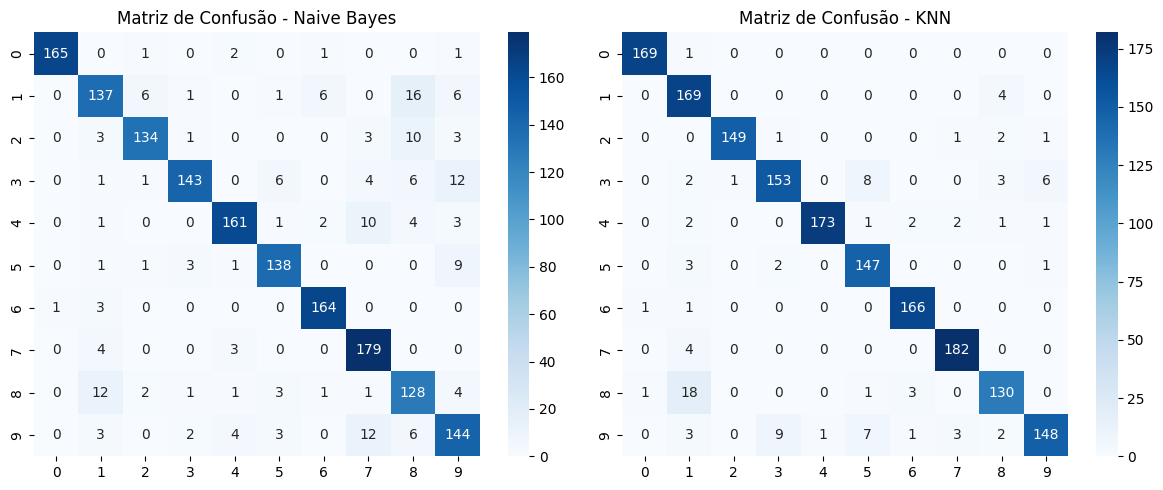

In [79]:
print("Modelo Naive Bayes")
print("Acurácia:", accuracy_NB)
print("Relatório:\n", classification_report_NB)
print("Modelo KNN")
print("Acurácia:", accuracy_KNN)
print("Relatório:\n", classification_report_KNN)

# Plotar as duas matrizes de confusão em heatmap
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.heatmap(confusion_matrix(y_test_digits, y_pred_NB), annot=True, fmt='d', cmap='Blues', ax=axes[0])
axes[0].set_title('Matriz de Confusão - Naive Bayes')
axes[0].set

sns.heatmap(confusion_matrix(y_test_digits, y_pred_KNN), annot=True, fmt='d', cmap='Blues', ax=axes[1])
axes[1].set_title('Matriz de Confusão - KNN')

plt.tight_layout()

Portanto, o modelo utilizando o algoritmo KNN se saiu melhor na classificação dos dígitos.